- We can broadly classify NLP into 2 types:
    1. Natural Language Understanding (Text Classificatio)
    2. Natural Language Generation (Text Generation)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/Users/Ashish/Desktop/Python Projects/Spam Email Classification/emails.csv")

In [3]:
data.head()

,v1,v2
0,spam,.: naturally irresistible your corporate ident...
1,spam,.: the stock trading gunslinger fanny is merr...
2,spam,.: unbelievable new homes made easy im wantin...
3,spam,.: 4 color printing special request additiona...
4,spam,".: do not have money , get software cds from h..."


In [4]:
data.columns = ["labels", "emails"]

In [5]:
data.head()

,labels,emails
0,spam,.: naturally irresistible your corporate ident...
1,spam,.: the stock trading gunslinger fanny is merr...
2,spam,.: unbelievable new homes made easy im wantin...
3,spam,.: 4 color printing special request additiona...
4,spam,".: do not have money , get software cds from h..."


In [8]:
data["character_counts"] = data["emails"].apply(lambda x: len(x))

In [9]:
data.head()

,labels,emails,character_counts
0,spam,.: naturally irresistible your corporate ident...,1478
1,spam,.: the stock trading gunslinger fanny is merr...,592
2,spam,.: unbelievable new homes made easy im wantin...,442
3,spam,.: 4 color printing special request additiona...,494
4,spam,".: do not have money , get software cds from h...",229


In [10]:
import string

In [11]:
punct = string.punctuation

In [12]:
data["puncts"] = data["emails"].apply(lambda x: len([t for t in x if t in punct]))

In [13]:
data.head()

,labels,emails,character_counts,puncts
0,spam,.: naturally irresistible your corporate ident...,1478,137
1,spam,.: the stock trading gunslinger fanny is merr...,592,2
2,spam,.: unbelievable new homes made easy im wantin...,442,9
3,spam,.: 4 color printing special request additiona...,494,26
4,spam,".: do not have money , get software cds from h...",229,14


In [14]:
# Check if there are any missing data in the dataset
data.isnull().sum()

labels              0
emails              0
character_counts    0
puncts              0
dtype: int64

- There are no null values

In [15]:
data.shape

(5727, 4)

- There are 5727 emails and 4 columns

In [16]:
# Counting the number of ham and spam emails

data["labels"].value_counts()

ham     4359
spam    1368
Name: labels, dtype: int64

- From the data we can see that:
    1. There are 4359 ham emails and 1368 spam emails.
    2. This is a very unbalanced data. Hence we have to create a dataset with equal number of ham and spam emails
    3. This will be a balanced dataset

### Creating a balanced data set

- The balanced dataset will have 1368 ham emails and 1368 spam emails

In [17]:
# getting all the ham messages

ham = data[data["labels"] == "ham"]

In [18]:
# getting all the spam messages

spam = data[data["labels"] == "spam"]

In [19]:
ham.head()

,labels,emails,character_counts,puncts
1368,ham,".: hello guys , i ' m "" bugging you "" for you...",1182,52
1369,ham,.: sacramento weather station fyi - - - - - ...,1985,128
1370,ham,.: from the enron india newsdesk - jan 18 th n...,7896,256
1371,ham,.: re : powerisk 2001 - your invitation angel...,3632,114
1372,ham,.: re : resco database and customer capture s...,5493,307


In [20]:
spam.head()

,labels,emails,character_counts,puncts
0,spam,.: naturally irresistible your corporate ident...,1478,137
1,spam,.: the stock trading gunslinger fanny is merr...,592,2
2,spam,.: unbelievable new homes made easy im wantin...,442,9
3,spam,.: 4 color printing special request additiona...,494,26
4,spam,".: do not have money , get software cds from h...",229,14


In [21]:
ham.shape, spam.shape

((4359, 4), (1368, 4))

In [22]:
ham = ham.sample(spam.shape[0])

In [23]:
ham.shape, spam.shape # Now ham and spam dataset are of same size

((1368, 4), (1368, 4))

In [24]:
new_data = ham.append(spam, ignore_index = True)

In [25]:
new_data.head()

,labels,emails,character_counts,puncts
0,ham,.: pac reminder last month you received an em...,4524,120
1,ham,".: re : thanks , please tell me if you need a...",3275,197
2,ham,.: re : time keeping hi brad : i am it for o...,758,45
3,ham,".: re : lsu seminar visit dear vince , would...",1013,64
4,ham,.: re : fwd : australian energy 2000 dear vin...,2265,258


In [30]:
ham

,labels,emails,character_counts,puncts
4807,ham,.: pac reminder last month you received an em...,4524,120
4134,ham,".: re : thanks , please tell me if you need a...",3275,197
5388,ham,.: re : time keeping hi brad : i am it for o...,758,45
2722,ham,".: re : lsu seminar visit dear vince , would...",1013,64
3496,ham,.: re : fwd : australian energy 2000 dear vin...,2265,258
1596,ham,".: re : var and credit meeting on wednesday , ...",464,17
5267,ham,.: charm conference call please let me know w...,1026,87
4452,ham,.: re : loan documents thanks for the kind wo...,719,50
2941,ham,".: it resources guys , in response to the off...",621,14
3851,ham,.: elements of power ( 4 ) dear colleagues : ...,12142,402


### Exploritary data analysis on the dataset

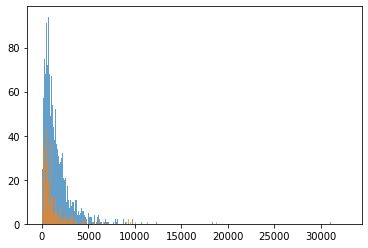

In [34]:
# Plotting character counts of ham and spam emails
plt.hist(data[data["labels"]== "ham"]["character_counts"], bins = 1000, alpha = 0.7)
plt.hist(data[data["labels"]== "spam"]["character_counts"], bins = 1000, alpha = 0.7)
plt.show()

- The character counts of ham and spam emails are almost similar. No conclusion can be drawn

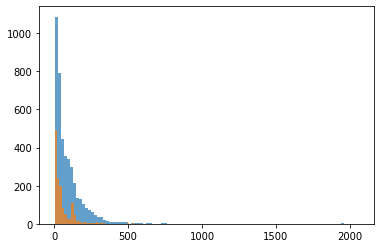

In [36]:
# Plotting punctuation counts of ham and spam emails

plt.hist(data[data["labels"]== "ham"]["puncts"], bins = 100, alpha = 0.7)
plt.hist(data[data["labels"]== "spam"]["puncts"], bins = 100, alpha = 0.7)
plt.show()

- The punctuation counts of ham and spam emails are almost similar. No conclusion can be drawn

### Data Preparation

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.pipeline import Pipeline

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
new_data.head()

,labels,emails,character_counts,puncts
0,ham,.: pac reminder last month you received an em...,4524,120
1,ham,".: re : thanks , please tell me if you need a...",3275,197
2,ham,.: re : time keeping hi brad : i am it for o...,758,45
3,ham,".: re : lsu seminar visit dear vince , would...",1013,64
4,ham,.: re : fwd : australian energy 2000 dear vin...,2265,258


In [49]:
X_train, X_test, y_train, y_test = train_test_split(new_data["emails"], new_data["labels"], test_size = 0.2, random_state = 0, shuffle = True, stratify = new_data["labels"])

- spam dataset has been appended over ham dataset. Hence shuffle is used to get both spam emails and ham emails for training.
- Stratify makes sure that spam and ham emails are split in 30-70 train test split.

### Bag of words creation`

In [43]:
vectorizer = TfidfVectorizer()

In [44]:
X_train = vectorizer.fit_transform(X_train)

In [45]:
X_train.shape

(2188, 25367)

- This means that the vector has 25367 unique words which form the columns
- There are 2188 emails in training dataset

### Pipeline and Random forest classifier

- There are alot of repeated process for training and testing dataset seperately. Hence we make use of pipeline.
- **Pipeline** is a sequence of operations that will be executed one after another

In [47]:
clf = Pipeline([("tfidf", TfidfVectorizer()), ("clf", RandomForestClassifier(n_estimators = 100, n_jobs = -1))])

In [50]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,..._jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

- Pipeline saves alot of time. We dont have to do tfidf vectorization and Randomforest classification again and again for X_train, X_test, y_train and y_test. We just have to pass it through pipeline

In [51]:
y_pred = clf.predict(X_test)

In [52]:
confusion_matrix(y_test, y_pred)

array([[264,  10],
       [  1, 273]], dtype=int64)

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98       274
        spam       0.96      1.00      0.98       274

   micro avg       0.98      0.98      0.98       548
   macro avg       0.98      0.98      0.98       548
weighted avg       0.98      0.98      0.98       548



In [54]:
accuracy_score(y_test, y_pred)

0.9799270072992701

### SVM

In [72]:
clf = Pipeline([("tfidf", TfidfVectorizer()), ("clf", SVC(C=2500, gamma = "auto"))])

In [73]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [74]:
y_pred = clf.predict(X_test)

In [75]:
confusion_matrix(y_test, y_pred)

array([[264,  10],
       [  0, 274]], dtype=int64)

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98       274
        spam       0.96      1.00      0.98       274

   micro avg       0.98      0.98      0.98       548
   macro avg       0.98      0.98      0.98       548
weighted avg       0.98      0.98      0.98       548



In [77]:
accuracy_score(y_test, y_pred)

0.9817518248175182